In [1]:
import torch
import torch.nn as nn                  #  신경망 모델들이 포함
import torch.optim as optim            #  경사하강법 알고리즘
import torch.nn.init as init           #  텐서에 초깃값을 주기 위해 필요한 함수들

In [2]:
num_data = 1000  #  횟수를 num_data와 num_epoch라는 변수에 저장
num_epoch = 500  #  횟수를 num_data와 num_epoch라는 변수에 저장

x = init.uniform_(torch.Tensor(num_data, 1), -10, 10) # x라는 변수에 [num_data, 1] 모양의 텐서를 생성하는데 
                                                      #  이 텐서의 값들을 init.uniform_()이라는 함수로 균등하게 초기화함
    
# y에 노이즈를 추가하기 위해 y_noise라는 변수를 만듦
# 데이터에 어떠한 관계가 존재한다고 해도 보통 센서나 관측을 통해 들어오는 데이터는
# 노이즈가 추가된 상태로 들어오는 경우가 대부분이기 때문
# 즉, 현실성을 반영하기 위해 노이즈를 추가한 것
# 노이즈는 표준정규분포를 따르는 노이즈를 사용하며, 이를 가우시안 노이즈라고 한다
    
#  init.normal_() 함수를 통해 초기화. 
#  mean 은 default인 0을 쓰고, std (표준편차) 는 1로 지정
noise = init.normal_(torch.FloatTensor(num_data, 1 ), std = 1)  

#  y = 2x + 3
y = 2*x + 3
#  noise를 추가한 y => 결국은 label
y_noise = 2*(x + noise) + 3

In [3]:
model = nn.Linear(1, 1)  #  선형회귀
loss_func = nn.L1Loss()    #  L1손실 => 차이의 절댓값의 평균 => 평균제곱오차가 아닌 절댓값으로 한 것!!
optimizer = optim.SGD(model.parameters(), lr = 0.01)  #  SGD : Stochastic gradient descent, lr (alpha) == 학습률

In [4]:
%%time
label = y_noise  #  y_noise를 label로 지정

# epoch 만큼 반복
for i in range(num_epoch):
    # 각 반복때마다 지난번에 계산했던 기울기를 0으로 초기화
    optimizer.zero_grad() 
    # 선형회귀 모델에 x를 전달해서 해당 결과를 output에 저장
    output = model(x)
    
    # |output - y_noise| 를 loss에 저장
    loss = loss_func(output, label)
    # loss.backward()를 호출하면 각 변수, 즉 w, b에 대한 기울기가 계산된다.
    loss.backward()
    
    # optimizer 최적화 함수 step() 호출
    # 인수로 들어갔던 model,parameters() 에서 리턴되는 변수들의 기울기에 
    # 학습률 0.01을 곱하여 빼줌으로써 업데이트 한다.
    optimizer.step()
    
    if i % 10 == 0:
        print(loss.data)
        
    param_list = list(model.parameters())
    print(param_list[0].item(), param_list[1].item())

tensor(9.9348)
0.09320496022701263 -0.6104046106338501
0.13930077850818634 -0.608504593372345
0.18529553711414337 -0.6065645813941956
0.23119878768920898 -0.6045845746994019
0.2769636809825897 -0.6025645732879639
0.322481632232666 -0.6004645824432373
0.3679368495941162 -0.5983245968818665
0.41319572925567627 -0.5961245894432068
0.4583468735218048 -0.5939046144485474
0.5031793117523193 -0.5915846228599548
tensor(7.8532)
0.5478746294975281 -0.589224636554718
0.5924756526947021 -0.5868446230888367
0.6369175910949707 -0.584424614906311
0.6811028718948364 -0.5819445848464966
0.7248406410217285 -0.5793445706367493
0.7682647705078125 -0.5766245722770691
0.8112070560455322 -0.5737645626068115
0.8536047339439392 -0.5707645416259766
0.8953019380569458 -0.5676045417785645
0.9363924860954285 -0.564304530620575
tensor(5.9748)
0.9771259427070618 -0.5609245300292969
1.0172086954116821 -0.5574045181274414
1.056426763534546 -0.5537045001983643
1.0944620370864868 -0.5497444868087769
1.1316457986831665 -

1.9966378211975098 2.1065149307250977
1.9967783689498901 2.110294818878174
1.9968500137329102 2.1140549182891846
1.9969216585159302 2.1178150177001953
1.9970358610153198 2.121535062789917
tensor(1.7791)
1.9971500635147095 2.1252551078796387
1.9974042177200317 2.128955125808716
1.997658371925354 2.132655143737793
1.9978314638137817 2.136315107345581
1.9980045557022095 2.139975070953369
1.998013973236084 2.1436150074005127
1.9980233907699585 2.1472549438476562
1.998032808303833 2.1508948802948
1.9980312585830688 2.154514789581299
1.9981378316879272 2.1581146717071533
tensor(1.7657)
1.9982444047927856 2.161714553833008
1.998350977897644 2.1653144359588623
1.9984575510025024 2.168914318084717
1.9985641241073608 2.1725142002105713
1.9986088275909424 2.1760942935943604
1.9985285997390747 2.179654359817505
1.9984959363937378 2.1831743717193604
1.9984632730484009 2.186694383621216
1.9984999895095825 2.1901943683624268
1.9984679222106934 2.1936542987823486
tensor(1.7531)
1.9984358549118042 2.19

In [5]:
import torch
import torch.nn as nn                  #  신경망 모델들이 포함
import torch.optim as optim            #  경사하강법 알고리즘
import torch.nn.init as init           #  텐서에 초깃값을 주기 위해 필요한 함수들

num_data = 1000
num_epoch = 10000

## input, label 설정 구간
## input, label 설정 구간
## input, label 설정 구간
noise = init.normal_(torch.FloatTensor(num_data, 1), std = 1)
x = init.uniform_(torch.Tensor(num_data, 1), -15, 15)
y = (x**2) + 3
y_noise = y + noise

# Sequential 은 여러 계층을 담는 컨테이너 같은 역할이라고 생각
model = nn.Sequential(
        nn.Linear(1,6),
        nn.ReLU(),
        nn.Linear(6,10),
        nn.ReLU(),
        nn.Linear(10,6),
        nn.ReLU(),
        nn.Linear(6,1)
    )

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr = 0.0002)

loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()   # 
    output = model(x)       # forward
    loss = loss_func(output, y_noise)  # loss 계산
    loss.backward()         # backward
    optimizer.step()        # 경사하강법
    loss_array.append(loss)  # loss 기록

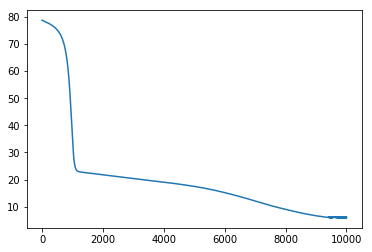

In [7]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()